# Model selection in regression. AIC <h3 style="color:green">Frequentist version</h3>

### Dealing with multicollinearity and redundant information

_Adapted from Josep Fortiana (2023-04-24) by Jordi Abante (2024-04-19)_

# 01 - _Ill-conditioned regressions_

## GPA (Grade Point Average) dataset

The GPA dataset has 30 observacions (for 30 students) of 5 variables:

`gpa`:   "graduate grade point average"

`greq`:  "GRE exam quantitative score"

`grev`:  "GRE exam verbal score"

`mat`:   "Miller Analogies Test score"

`ar`:    "rating by professors"

#### Read the data file into R:

In [1]:
gpa<-read.table("Data/gpa.txt",header=TRUE)
str(gpa)

'data.frame':	30 obs. of  5 variables:
 $ gpa : num  3.2 4.1 3 2.6 3.7 4 4.3 2.7 3.6 4.1 ...
 $ greq: int  625 575 520 545 520 655 630 500 605 555 ...
 $ grev: int  540 680 480 520 490 535 720 500 575 690 ...
 $ mat : int  65 75 65 55 75 65 75 75 65 75 ...
 $ ar  : num  2.7 4.5 2.5 3.1 3.6 4.3 4.6 3 4.7 3.4 ...


#### Fit a linear model to predict the response `gpa` from the remaining four variables:

In [2]:
gpa.lm.1<-lm(gpa~.,data=gpa)
summary(gpa.lm.1)


Call:
lm(formula = gpa ~ ., data = gpa)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7876 -0.2297  0.0069  0.2673  0.5260 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.738107   0.950740  -1.828   0.0795 .
greq         0.003998   0.001831   2.184   0.0385 *
grev         0.001524   0.001050   1.451   0.1593  
mat          0.020896   0.009549   2.188   0.0382 *
ar           0.144234   0.113001   1.276   0.2135  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3874 on 25 degrees of freedom
Multiple R-squared:  0.6405,	Adjusted R-squared:  0.5829 
F-statistic: 11.13 on 4 and 25 DF,  p-value: 2.519e-05


### Compute the Variance Inflation Factor (VIF) and condition number

In [3]:
V<-vcov(gpa.lm.1)
round(V,6)

,(Intercept),greq,grev,mat,ar
(Intercept),0.903906,-0.001336,-3.6e-05,-0.003773,0.036357
greq,-0.001336,0.000003,-1.0e-06,0.000002,-0.000082
grev,-0.000036,-0.000001,1.0e-06,-0.000003,-0.000008
mat,-0.003773,0.000002,-3.0e-06,0.000091,-0.000462
ar,0.036357,-0.000082,-8.0e-06,-0.000462,0.012769


Diagonal entries in $V$ are the variances of the coefficient estimators. 

They are acceptable. When they are large, the model (and its predictions) are unstable. This behaviour can be more precisely detected by using the _Variance Inflation Factors (VIF),_ which we compute with the `vif()` function from the `car` package. 

$$
\widehat{\operatorname{var}}\left(\hat{\beta}_j\right)=\frac{s^2}{(n-1) \widehat{\operatorname{var}}\left(X_j\right)} \cdot \frac{1}{1-R_j^2}
$$

Intuitively, VIF's quantify _multicollinearity_ in the data, that is, linear dependences in the set of predictors. The VIF of a predictor is the proportion of its actual variance relative to the one it would have if it were linearly independent from the others. The commonly accepted rule of thumb is that a VIF larger than 10 is too large, indicating multicollinearity. 

In [4]:
# install.packages("car",dependencies=TRUE,repos="https://cloud.r-project.org")
require(car)
#?vif

Loading required package: car

Loading required package: carData



In [5]:
vif(gpa.lm.1)

greq     grev      mat       ar 
1.530841 1.469468 1.506900 1.734779

Another quantity used in multicollinearity detection is the _condition number_ of the model matrix $X$. The condition number of a matrix $A$, $\kappa(A)$, measures the numerical inaccuracy introduced by solving the equation $A\cdot x = b$ for a given column vector $b$. It is the ratio between the maximum and minimum singular values of $A$. When $\kappa\approx1$ there is no significant precision loss. When $\kappa=10^k$ the precision loss of $k$ significant decimal digits:

The `kappa()` function in R gives the condition number of a matrix. We check the condition number of the model matrix $X$ of this regression:

In [6]:
X.gpa<-model.matrix(gpa.lm.1)
kappa(X.gpa)

[1] 5506.107

The condition number $\kappa$ is not small, but the VIF's are acceptable.

#### Exploring the effect of adding a new, redundant, variable

A _"new"_ artificial predictor variable adding no new information. A linear combination plus a random noise:

In [7]:
new<-gpa$greq+gpa$grev+gpa$mat+rnorm(30,0,0.5)
gpanew<-data.frame(gpa,new)

#### New linear model using the new, enlarged, predictor set

In [8]:
gpa.lm.2<-lm(gpa~.,data=gpanew)
summary(gpa.lm.2)


Call:
lm(formula = gpa ~ ., data = gpanew)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77432 -0.21068 -0.01688  0.27216  0.64756 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -1.6369     0.9336  -1.753   0.0923 .
greq          0.2075     0.1412   1.469   0.1548  
grev          0.2054     0.1415   1.451   0.1596  
mat           0.2238     0.1412   1.586   0.1259  
ar            0.1745     0.1126   1.549   0.1344  
new          -0.2038     0.1414  -1.441   0.1626  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3793 on 24 degrees of freedom
Multiple R-squared:  0.6691,	Adjusted R-squared:  0.6002 
F-statistic: 9.706 on 5 and 24 DF,  p-value: 3.62e-05


#### VIF's and condition number of the new model

Note VIF is large for linearly related covariates only:

In [9]:
round(vif(gpa.lm.2),3)

greq      grev       mat        ar       new 
 9503.309 27819.738   343.528     1.797 56534.715

In [10]:
X.gpa.2<-model.matrix(gpa.lm.2)
round(kappa(X.gpa.2),2)

[1] 11327.44

###  `US.Census`  dataset

Polynomial regression tends to be ill-conditioned. This behaviour is exemplified with this classic dataset, appearing in the MATLAB distribution many years ago. Data of US population taken from the US census from 1900 to 1990. The purpose is to predict the population on 2050. Variables are:

- $t$:&emsp;&emsp;&emsp; year,

- $p$:&emsp;&emsp;&emsp; population (in millions).

We perform polynomial regressions of $p$ on $t$ with degrees $k$ from 1 to 6. We observe that from degree 4 on the model becomes computationally unstable and impossible in practice.

In [11]:
t <-seq(1900,1990,by=10)
p <-c(75.995,91.972,105.711,123.203,131.669,150.697,179.323,203.212,226.505,249.633)

#### Simple linear regression

In [12]:
US.pop.lm.1<-lm(p~t)
summary(US.pop.lm.1)


Call:
lm(formula = p ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7294  -2.9507   0.6695   5.5338   9.1310 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.594e+03  1.785e+02  -20.13 3.87e-08 ***
t            1.927e+00  9.178e-02   20.99 2.78e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.337 on 8 degrees of freedom
Multiple R-squared:  0.9822,	Adjusted R-squared:  0.9799 
F-statistic: 440.7 on 1 and 8 DF,  p-value: 2.782e-08


We can plot the data, regression and a prediction (green).

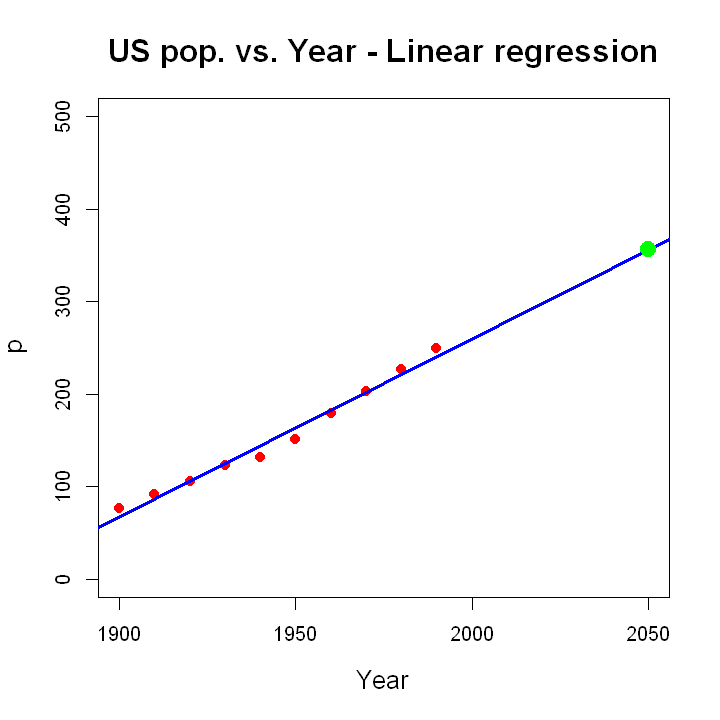

In [13]:
options(repr.plot.width=6, repr.plot.height=6)
plot(p~t,pch=19,col="red",cex=1.1,xlim=c(1900,2050),ylim=c(0,500),xlab="Year",
         main="US pop. vs. Year - Linear regression",cex.lab=1.3,cex.main=1.6)
abline(US.pop.lm.1,lwd=3.1,col="blue")
pred.2050.1<-predict(US.pop.lm.1,newdata=data.frame(t=2050))
points(2050,pred.2050.1,pch=19,cex=1.8,col="green")

In [14]:
round(kappa(model.matrix(US.pop.lm.1)),2)

[1] 131805.4

#### Linear regression with a quadratic term

In [15]:
US.pop.lm.2<-lm(p~t+I(t^2))
summary(US.pop.lm.2)


Call:
lm(formula = p ~ t + I(t^2))

Residuals:
   Min     1Q Median     3Q    Max 
-5.313 -2.158  1.738  2.129  3.877 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.147e+04  6.288e+03   5.005 0.001557 ** 
t           -3.414e+01  6.467e+00  -5.279 0.001150 ** 
I(t^2)       9.271e-03  1.663e-03   5.577 0.000836 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.82 on 7 degrees of freedom
Multiple R-squared:  0.9967,	Adjusted R-squared:  0.9958 
F-statistic:  1065 on 2 and 7 DF,  p-value: 2.011e-09


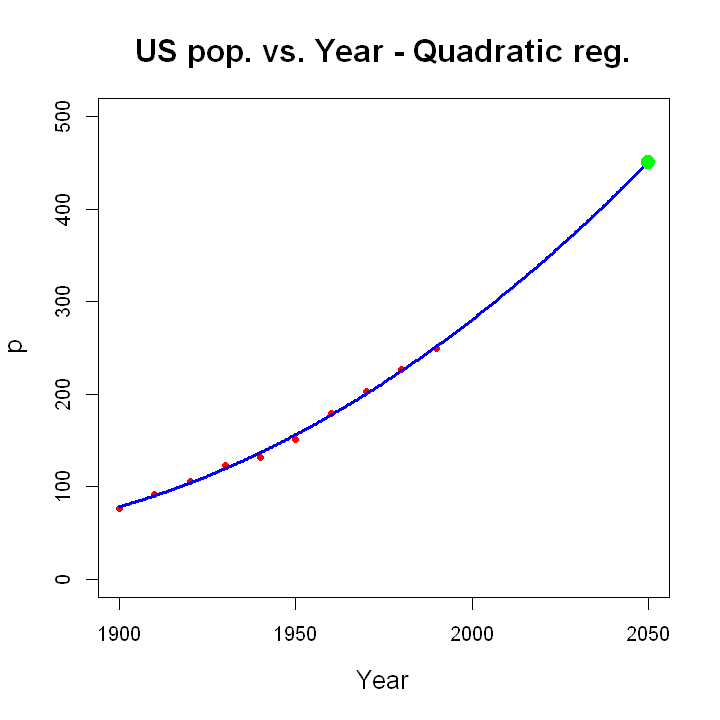

In [16]:
options(repr.plot.width=6, repr.plot.height=6)
plot(p~t,pch=19,col="red",cex=0.8,xlim=c(1900,2050),ylim=c(0,500),xlab="Year",
     main="US pop. vs. Year - Quadratic reg.",cex.lab=1.3,cex.main=1.6)
t1<-seq(1900,2050,length=400)
p1<-predict(US.pop.lm.2,newdata=data.frame(t=t1))
lines(t1,p1,lwd=3.1,col="blue")
pred.2050.2<-predict(US.pop.lm.2,newdata=data.frame(t=2050))
points(2050,pred.2050.2,pch=19,cex=1.5,col="green")

In [17]:
round(vif(US.pop.lm.2),3)
round(kappa(model.matrix(US.pop.lm.2)),2)

t   I(t^2) 
23644.91 23644.91

[1] 20040468331

#### Cubic polynomial regression

In [18]:
US.pop.lm.3<-lm(p~t+I(t^2)+I(t^3))
summary(US.pop.lm.3)


Call:
lm(formula = p ~ t + I(t^2) + I(t^3))

Residuals:
   Min     1Q Median     3Q    Max 
-5.272 -2.119  1.719  2.187  3.773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -9.595e+03  5.459e+05  -0.018    0.987
t            2.922e+01  8.421e+02   0.035    0.973
I(t^2)      -2.331e-02  4.330e-01  -0.054    0.959
I(t^3)       5.583e-06  7.421e-05   0.075    0.942

Residual standard error: 4.124 on 6 degrees of freedom
Multiple R-squared:  0.9967,	Adjusted R-squared:  0.9951 
F-statistic: 609.2 on 3 and 6 DF,  p-value: 7.657e-08


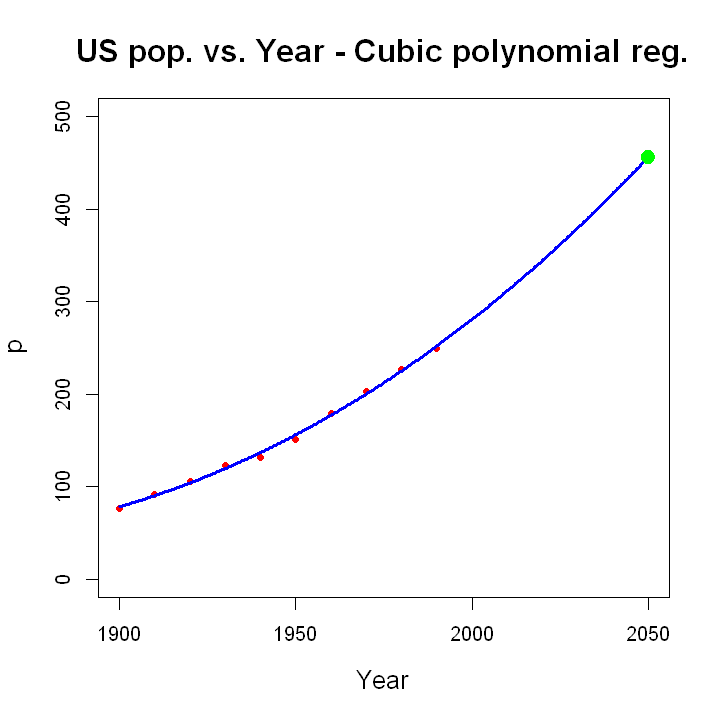

In [19]:
options(repr.plot.width=6, repr.plot.height=6)
plot(p~t,pch=19,col="red",cex=0.8,xlim=c(1900,2050),ylim=c(0,500),xlab="Year",
         main="US pop. vs. Year - Cubic polynomial reg.",cex.lab=1.3,cex.main=1.6)
t1<-seq(1900,2050,length=400)
p1<-predict(US.pop.lm.3,newdata=data.frame(t=t1))
lines(t1,p1,lwd=3.1,col="blue")
pred.2050.3<-predict(US.pop.lm.3,newdata=data.frame(t=2050))
points(2050,pred.2050.3,pch=19,cex=1.5,col="green")

In [20]:
vif(US.pop.lm.3)
kappa(model.matrix(US.pop.lm.3))

t     I(t^2)     I(t^3) 
 343955929 1376166224  344168118

[1] 3.184907e+15

#### Polynomial regression of degree 4

In [21]:
US.pop.lm.4<-lm(p~t+I(t^2)+I(t^3)+I(t^4))
summary(US.pop.lm.4)


Call:
lm(formula = p ~ t + I(t^2) + I(t^3) + I(t^4))

Residuals:
   Min     1Q Median     3Q    Max 
-5.272 -2.119  1.719  2.187  3.773 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -9.595e+03  5.459e+05  -0.018    0.987
t            2.922e+01  8.421e+02   0.035    0.973
I(t^2)      -2.331e-02  4.330e-01  -0.054    0.959
I(t^3)       5.583e-06  7.421e-05   0.075    0.942
I(t^4)              NA         NA      NA       NA

Residual standard error: 4.124 on 6 degrees of freedom
Multiple R-squared:  0.9967,	Adjusted R-squared:  0.9951 
F-statistic: 609.2 on 3 and 6 DF,  p-value: 7.657e-08


The coefficient of the 4-th degree term does not appear, due to numerical problems

Warning message in predict.lm(US.pop.lm.4, newdata = data.frame(t = t1)):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(US.pop.lm.4, newdata = data.frame(t = 2050)):
"prediction from a rank-deficient fit may be misleading"


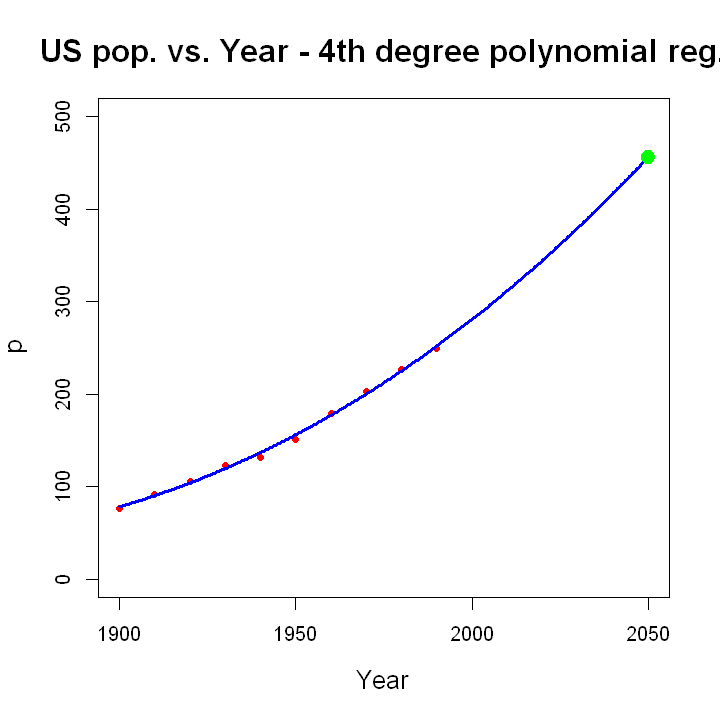

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
plot(p~t,pch=19,col="red",cex=0.8,xlim=c(1900,2050),ylim=c(0,500),xlab="Year",
     main="US pop. vs. Year - 4th degree polynomial reg.",cex.lab=1.3,cex.main=1.6)
t1<-seq(1900,2050,length=400)
p1<-predict(US.pop.lm.4,newdata=data.frame(t=t1))
lines(t1,p1,lwd=3.1,col="blue")
pred.2050.4<-predict(US.pop.lm.4,newdata=data.frame(t=2050))
points(2050,pred.2050.4,pch=19,cex=1.5,col="green")

In [24]:
# vif(US.pop.lm.4)
## Error in vif.default(US.pop.lm.4): there are aliased coefficients in the model
kappa(model.matrix(US.pop.lm.4))

[1] 5.301991e+20

#### Polynomial regression of higher degrees

R has a better control of numerical disasters than what used to be the standard in vintage MATLAB, thus it warns about the problem. 

Degree 6 regression resulted in the following notorious graph:

<div>
<img src="./Img/MATLAB.Deg6.reg.jpg" width="350">
</div>

# 02 - Comparing regression models

### Comparing regressions: relevant quantities

To this end we have the following available quantities:  

1. $\operatorname{ResSS}$, the Residual Sum of Squares
2. The coefficient of determination $R^2$
3. The $F$ statistic.
4. **The $\operatorname{AIC}$ statistic (Akaike Information Criterion).** 

## Residual SS

$\operatorname{ResSS}$ is a goodness-of-fit measure: smaller values indicate a better fit. However, when a model $L_1$ is obtained by adding predictors to an initial one $L_0$, inevitably $\operatorname{ResSS}$ decreases ($\operatorname{ResSS}_1\leq \operatorname{ResSS}_0$) by geometry, since in the $L_1$ we are projecting on a subspace larger than in $L_0$. Similarly $R_1^2\geq R_0^2$. From a statistical perspective we need to decide whether an observed decrease in $\operatorname{ResSS}$, or increase in $R^2$ is significant. This is the purpose of $F$ and $\operatorname{AIC}$.

## F statistic

When we get a new model $L_1$ by adding a single predictor to a model $L_0$, the comparison $F$ statistic is defined as the relative decrease in $\operatorname{ResSS}$, that is, the ratio:

`ResSS0` and `ResSS` are, respectively, the residual sum of squares of $L_0$  and $L_1$, and `df1` is the number of degrees of freedom of $L_1$. `F01` is a test statistic to decide between the null hypothesis:

$$
    H_{0} = \textrm{The new predictor does not improve the model}. 
$$

versus the alternative that it does. When the models are Gauss-Markov normal, `F01` follows a Fisher-Snedecor $F$ distribution with 1 and `df1` degrees of freedom.

## AIC

$\operatorname{AIC}$ (Akaike Information Criterion) is an answer to a different problem: adding a predictor to a prediction model means we are adding a parameter to the prediction function (a linear function in this case) and, in general, increasing the number of parameters in a prediction function learned from a given training dataset tends to fit better this particular dataset at the cost of deteriorating the quality of predictions for other samples _from the same statistical population_ from which the training sample was extracted. This is another instance of the bias/variance tradeoff. 

$\operatorname{AIC}$ is a _penalized (minus)log-likelihood,_ the difference:

$$
    -\log\cal{L}+\lambda\,\cal{P}, \mskip30mu \lambda>0,
$$

where an increase in log-likelihood gained by adding a new parameter can be cancelled by an increase in the penalization term $\cal{P}$. In this way we can tell the better from two _nested_ models (a pair of models where the set of predictors in one of them is a subset of that in the other). The better model is the one with a smaller $\operatorname{AIC}$ (tending to a larger likelihood). In R the $\operatorname{AIC}$ of a model $L$ can be obtained with:

Which uses the definition:

In particular, for a linear model, see, e.g.,
John Maindonald & W. John Braun, _Data Analysis and Graphics Using R. 3rd Ed. (DAAG),_ pag. 187:

## `Steam` dataset
#### Monthly register of a steam generating equipment in an industrial glycerin production plant

### Variables:

01. `y`:    Monthly pounds of steam used (response variable).
02. `x01`:  Pounds of Real Fatty Acid in storage per month.
03. `x02`:  Pounds of crude glycerin made.
04. `x03`:  Average wind velocity (miles per hour).
05. `x04`:  Number of (calendar) days in that month (28-31).
06. `x05`:  Number of operating days for the given month.
07. `x06`:  Number of days below 32 degrees Farenheit (0 degrees Celsius).
08. `x07`:  Average outside temperature in Farenheit.
09. `x08`:  Squared average wind velocity.
10. `x09`: Number of production startups in that month.

Data from Draper and Smith (1981) _"Applied Regression Analysis, 2nd ed."_ P. 615ff.

Read from: `Steam1.txt` (Data with names on first row).
This dataset should also appear in the `aprean3` package (companion to the 3rd edition of Draper & Smith's book).

In [25]:
Steam<-read.table("Data/Steam1.txt",header=TRUE)
str(Steam)

'data.frame':	25 obs. of  10 variables:
 $ y  : num  10.98 11.13 12.51 8.4 9.27 ...
 $ x01: num  5.2 5.12 6.19 3.89 6.28 5.76 3.45 6.57 5.69 6.14 ...
 $ x02: num  0.61 0.64 0.78 0.49 0.84 0.74 0.42 0.87 0.75 0.76 ...
 $ x03: num  7.4 8 7.4 7.5 5.5 8.9 4.1 4.1 4.1 4.5 ...
 $ x04: num  31 29 31 30 31 30 31 31 30 31 ...
 $ x05: num  20 20 23 20 21 22 11 23 21 20 ...
 $ x06: num  22 25 17 22 0 0 0 0 0 0 ...
 $ x07: num  35.3 29.7 30.8 58.8 61.4 71.3 74.4 76.7 70.7 57.5 ...
 $ x08: num  54.8 64 54.8 56.3 30.3 79.2 16.8 16.8 16.8 20.3 ...
 $ x09: num  4 5 4 4 5 4 2 5 4 5 ...


## Exercise:

With the `Steam` dataset, find the best subset of predictors of `y` from `(x01,x02,x03,x04,x05,x06,x07,x08,x09)`:

With such data as `Steam`, with $p$ predictors, there is a large number of possible regressions –precisely $2^p$, the number of subsets of the set of all predictors- which, in principle, they can be tested by repeatedly applying the above functions, either starting with the base model with no predictors other than 
intercept:

In [26]:
ls0<-lm(y~1, data=Steam)
summary(ls0)


Call:
lm(formula = y ~ 1, data = Steam)

Residuals:
   Min     1Q Median     3Q    Max 
-3.064 -1.024 -0.284  1.516  3.086 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4240     0.3261    28.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.631 on 24 degrees of freedom


and successively add predictors or, on the contrary, starting with the full model:

In [27]:
ls1<-lm(y~x01+x02+x03+x04+x05+x06+x07+x08+x09, data=Steam)
summary(ls1)


Call:
lm(formula = y ~ x01 + x02 + x03 + x04 + x05 + x06 + x07 + x08 + 
    x09, data = Steam)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0726 -0.3670  0.0758  0.2942  1.0436 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.227769   7.833663  -0.029  0.97719   
x01          0.197252   0.635859   0.310  0.76067   
x02          5.763660   4.466510   1.290  0.21644   
x03          1.985020   0.861398   2.304  0.03592 * 
x04          0.132288   0.231817   0.571  0.57668   
x05         -0.046401   0.060859  -0.762  0.45762   
x06         -0.005743   0.027373  -0.210  0.83664   
x07         -0.069204   0.018456  -3.750  0.00193 **
x08         -0.139526   0.060742  -2.297  0.03643 * 
x09         -0.318685   0.239128  -1.333  0.20252   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.644 on 15 degrees of freedom
Multiple R-squared:  0.9025,	Adjusted R-squared:  0.844 
F-statistic: 15.43 on 9 and 15 

And then successively remove them. For instance, we start with `ls0`, find the best single predictor and, keeping it we add a second one following the same procedure, and successively, until we find a satisfactory subset. This is the _forward_ variables selection method. Symmetrically, the _backward_ method starts with the full model `ls1` and sequentially removes variables.

It is worth noting that if, for instance, at a certain stage of a _forward_  procedure the current subset of variables is $A$, we have not tested all subsets of $A$ but only those in the path through which we arrived at $A$. To test them we should apply _backward_  selection from $A$ and so on. 

The `stats` package has a `step()` function to automate this process:

In [29]:
step(ls0,"~x01+x02+x03+x04+x05+x06+x07+x08+x09")

Start:  AIC=25.43
y ~ 1

       Df Sum of Sq    RSS     AIC
+ x07   1    45.592 18.223 -3.9042
+ x06   1    26.192 37.624 14.2192
+ x03   1    14.357 49.459 21.0568
+ x05   1    10.739 53.077 22.8216
+ x08   1     9.934 53.882 23.1981
+ x01   1     9.370 54.446 23.4584
+ x09   1     9.318 54.497 23.4820
+ x02   1     5.958 57.858 24.9779
<none>              63.816 25.4281
+ x04   1     1.193 62.623 26.9563

Step:  AIC=-3.9
y ~ x07

       Df Sum of Sq    RSS      AIC
+ x01   1     9.292  8.931 -19.7327
+ x02   1     8.438  9.785 -17.4508
+ x05   1     3.140 15.084  -6.6317
+ x04   1     2.623 15.600  -5.7902
+ x09   1     2.236 15.988  -5.1763
+ x06   1     1.712 16.511  -4.3711
<none>              18.223  -3.9042
+ x08   1     0.359 17.864  -2.4022
+ x03   1     0.224 17.999  -2.2134
- x07   1    45.592 63.816  25.4281

Step:  AIC=-19.73
y ~ x07 + x01

       Df Sum of Sq    RSS      AIC
<none>               8.931 -19.7327
+ x09   1     0.319  8.612 -18.6433
+ x04   1     0.238  8.693


Call:
lm(formula = y ~ x07 + x01, data = Steam)

Coefficients:
(Intercept)          x07          x01  
    9.47422     -0.07976      0.76165  


Also from the full model:

In [30]:
step(ls1)

Start:  AIC=-14.77
y ~ x01 + x02 + x03 + x04 + x05 + x06 + x07 + x08 + x09

       Df Sum of Sq     RSS      AIC
- x06   1    0.0183  6.2397 -16.6986
- x01   1    0.0399  6.2614 -16.6120
- x04   1    0.1351  6.3565 -16.2349
- x05   1    0.2411  6.4625 -15.8213
<none>               6.2214 -14.7719
- x02   1    0.6907  6.9121 -14.1401
- x09   1    0.7366  6.9581 -13.9743
- x08   1    2.1884  8.4098  -9.2369
- x03   1    2.2025  8.4240  -9.1949
- x07   1    5.8314 12.0529  -0.2394

Step:  AIC=-16.7
y ~ x01 + x02 + x03 + x04 + x05 + x07 + x08 + x09

       Df Sum of Sq     RSS      AIC
- x01   1    0.0462  6.2859 -18.5142
- x04   1    0.1455  6.3852 -18.1223
- x05   1    0.2587  6.4984 -17.6829
<none>               6.2397 -16.6986
- x02   1    0.6959  6.9356 -16.0551
- x09   1    0.7437  6.9834 -15.8837
- x08   1    2.1822  8.4219 -11.2011
- x03   1    2.1981  8.4378 -11.1539
- x07   1   11.7123 17.9520   7.7207

Step:  AIC=-18.51
y ~ x02 + x03 + x04 + x05 + x07 + x08 + x09

       Df Sum 


Call:
lm(formula = y ~ x02 + x03 + x05 + x07 + x08 + x09, data = Steam)

Coefficients:
(Intercept)          x02          x03          x05          x07          x08  
    3.47721      7.88356      2.15116     -0.06817     -0.06783     -0.15287  
        x09  
   -0.37100  


Reasonably enough, this combined _forward_ and _backward_ procedure is called _stepwise._

Finally, there is the strategy of computing all the possible $2^p$ regressions, with all the subsets in the set of predictors, from $\emptyset$ to the total number $p$ of predictors, and then comparing all the resulting $\operatorname{AIC}$ values, keeping the best one. 

This is the _All Subsets Regression_ method. Obviously, this computation is unfeasible by a brute force approach, except for models with a very small number of predictors. There are combinatorial _branch and bound_ algorithms allowing us to limit the number of actual regressions we need to evaluate in full. The method depends on imposing a partial ordering on the set of all possible regressions, giving it a tree-like structure, in which we will need to evaluate only a small number of nodes. The `leaps` package implements this procedure (the name originates from the idiom  _leaps and bounds)._